# 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 

df1 = pd.read_csv("/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/03_COP_U_전처리.csv")
df2 = pd.read_csv('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/뉴스심리지수(실험적 통계)_일별자료.csv' , encoding = 'cp949')
df3 = pd.read_csv('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/datatrend.csv' ,encoding = 'cp949')
np.random.seed(19670324)  # seed 값 지정

In [2]:
# 열 이름 바꾸기
df2.rename(columns = {'날짜':'de_dt'},inplace=True)
df3.rename(columns = {'일':'de_dt'},inplace=True)

# 데이터 병합

In [3]:
df = df1.merge(df2 , on = 'de_dt', how = 'inner')
df = df.merge(df3 , on = 'de_dt', how = 'inner')

In [4]:
df.info() # info를 통해 병합 과정 중 누락된 데이터가 있는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248247 entries, 0 to 248246
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cust         248247 non-null  object 
 1   ma_fem_dv    248247 non-null  object 
 2   ages         248247 non-null  object 
 3   zon_hlv      248247 non-null  object 
 4   rct_no       248247 non-null  object 
 5   cop_c        248247 non-null  object 
 6   br_c         248247 non-null  object 
 7   chnl_dv      248247 non-null  int64  
 8   de_dt        248247 non-null  object 
 9   vst_dt       248247 non-null  object 
 10  de_hr        248247 non-null  int64  
 11  buy_am       248247 non-null  int64  
 12  de_dt_month  248247 non-null  int64  
 13  de_day       248247 non-null  int64  
 14  뉴스심리지수       248247 non-null  float64
 15  서울           248247 non-null  int64  
 16  경기           248247 non-null  int64  
 17  총합           248247 non-null  int64  
dtypes: float64(1), int64(8),

# 상관분석을 통해서 외부 변수 활용 방안 모색

In [5]:
df.corr()

,chnl_dv,de_hr,buy_am,de_dt_month,de_day,뉴스심리지수,서울,경기,총합
chnl_dv,1.000000,-0.038266,-0.012845,0.081742,0.010245,0.006468,-0.028636,-0.024600,-0.026762
de_hr,-0.038266,1.000000,-0.007115,-0.000936,-0.008529,0.003702,0.015218,0.014951,0.015199
buy_am,-0.012845,-0.007115,1.000000,0.003539,0.009233,-0.000408,-0.003011,-0.002563,-0.002802
de_dt_month,0.081742,-0.000936,0.003539,1.000000,-0.002037,-0.210216,-0.125819,-0.055353,-0.090158
de_day,0.010245,-0.008529,0.009233,-0.002037,1.000000,0.002877,-0.243065,-0.234605,-0.240576
뉴스심리지수,0.006468,0.003702,-0.000408,-0.210216,0.002877,1.000000,0.076827,0.036023,0.056208
서울,-0.028636,0.015218,-0.003011,-0.125819,-0.243065,0.076827,1.000000,0.968888,0.991680
경기,-0.024600,0.014951,-0.002563,-0.055353,-0.234605,0.036023,0.968888,1.000000,0.992687
총합,-0.026762,0.015199,-0.002802,-0.090158,-0.240576,0.056208,0.991680,0.992687,1.000000


In [6]:
# 필요한 열만 추출
df = df[['cust', 'br_c', 'buy_am','de_dt_month','뉴스심리지수']]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

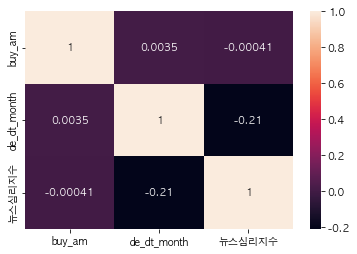

In [8]:
# 상관분석 히트맵
corr=df.corr()
sns.heatmap(corr, annot=True)

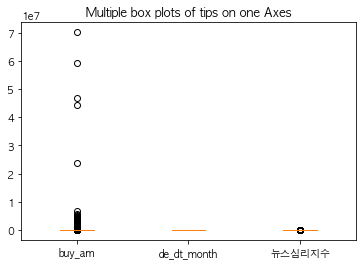

In [9]:
fig, ax = plt.subplots()
ax.boxplot([df['buy_am'], df['de_dt_month'], df['뉴스심리지수']])
plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2, 3],
           ['buy_am', 'de_dt_month', '뉴스심리지수'])
plt.show()

# 데이터 전처리 (로그화, 정규화)

In [10]:
# buy_am 값은 이상치가 너무 크고 최솟값과 최댓값 차이도 너무 크기 때문에 로그화를 하고 정규화 진행
df['buy_am'] = np.log(df['buy_am'])

In [11]:
#정규화 함수 및 적용 
def min_max_scaler(df):
    df_min = df.min()
    df_max = df.max()
    return (df-df_min)/(df_max-df_min)

In [12]:
df['buy_am'] = min_max_scaler(df['buy_am'])
df['de_dt_month'] = min_max_scaler(df['de_dt_month'])
df['뉴스심리지수'] = min_max_scaler(df['뉴스심리지수'])
df.head()

,cust,br_c,buy_am,de_dt_month,뉴스심리지수
0,M000034966,D011011,0.457713,0.818182,0.60429
1,M001248380,D010153,0.518997,0.818182,0.60429
2,M001694463,D020231,0.506996,0.818182,0.60429
3,M001694463,D020231,0.457713,0.818182,0.60429
4,M001697471,C010011,0.528461,0.818182,0.60429


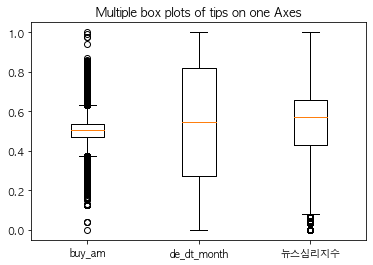

In [13]:
fig, ax = plt.subplots()
ax.boxplot([df['buy_am'], df['de_dt_month'], df['뉴스심리지수']])
plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2, 3],
           ['buy_am', 'de_dt_month', '뉴스심리지수'])
plt.show()

# 파생변수 만들기

In [14]:
df['values'] = df['buy_am'] + df['de_dt_month'] + df['뉴스심리지수']
df['values'] = min_max_scaler(df['values'])
df.head()

,cust,br_c,buy_am,de_dt_month,뉴스심리지수,values
0,M000034966,D011011,0.457713,0.818182,0.60429,0.666682
1,M001248380,D010153,0.518997,0.818182,0.60429,0.696554
2,M001694463,D020231,0.506996,0.818182,0.60429,0.690704
3,M001694463,D020231,0.457713,0.818182,0.60429,0.666682
4,M001697471,C010011,0.528461,0.818182,0.60429,0.701167


<AxesSubplot:ylabel='Frequency'>

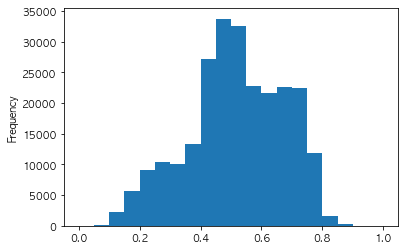

In [15]:
(df['values']).plot.hist(bins=20) # 그림을 그려서 정규화가 잘 되었는지 확인

# 고객, 상품별로 데이터 묶기

In [16]:
df_groupby = df.groupby(['cust','br_c'], as_index=False)
df_groupby = df_groupby.sum()
df_groupby.head()

,cust,br_c,buy_am,de_dt_month,뉴스심리지수,values
0,M000034966,D011011,0.457713,0.818182,0.604290,0.666682
1,M000059535,C010085,0.594310,0.181818,0.469692,0.357470
2,M000136117,D010062,7.487032,8.090909,7.066832,7.540852
3,M000136117,D011059,0.532648,0.727273,0.161952,0.443284
4,M000225114,C010011,0.515111,0.727273,0.476220,0.587922


In [17]:
print("shape:",df_groupby.shape)
print("중복 데이터:", df_groupby.duplicated().sum())

shape: (74897, 6)
중복 데이터: 0


In [18]:
df_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74897 entries, 0 to 74896
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cust         74897 non-null  object 
 1   br_c         74897 non-null  object 
 2   buy_am       74897 non-null  float64
 3   de_dt_month  74897 non-null  float64
 4   뉴스심리지수       74897 non-null  float64
 5   values       74897 non-null  float64
dtypes: float64(4), object(2)
memory usage: 3.4+ MB


In [19]:
df_groupby.isnull().sum() # 결측치 확인

cust           0
br_c           0
buy_am         0
de_dt_month    0
뉴스심리지수         0
values         0
dtype: int64

# 데이터 저장

In [20]:
# 데이터를 빠르게 로드할 수 있게 피클로 저장
df_groupby.to_pickle('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/COP_data_pickle')